In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
pf = pd.read_excel('../Data/Annotation_AllVideos_FPT_Fall_2022_new.xlsx')
columns = pf.columns
pf = pf[[x for x in columns if x != "Question 1: Food frame (1-5)" and x != "Annotated count"]].dropna()
# attractive = pf['Attractive Level (1-5)']
# pf[attractive == 1.5] = 2
# pf[attractive == 2.5] = 3
# pf[attractive == 3.5] = 4
# pf[attractive == 4.5] = 5
print(pf)

      ID Annotater     video id  Attractive Level (1-5)  \
1      1  nghiatnh  5OzrpNCyXqs                     5.0   
2      2   hoangnd  5OzrpNCyXqs                     5.0   
11    11      hanl  3qfTtx3yG5U                     4.0   
15    15  nghiatnh  rSTBg8w7F8I                     3.0   
16    16      hanl  rSTBg8w7F8I                     3.0   
..   ...       ...          ...                     ...   
828  786     haitm  UVasq9dkass                     2.0   
833  791     haitm  9eia-UYOTCg                     3.0   
837  795     haitm  4SB9AHOW7X0                     3.0   
841  799     haitm  y0E-cGIhcDo                     5.0   
845  803     haitm  qXNpAaB51U0                     2.0   

     Question 2: Sound (1-5) Question 2.1: Music (1-5)  \
1                        5.0                         4   
2                        5.0                         5   
11                       3.0                         3   
15                       5.0                         5   
1

In [40]:
columns = [
       'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)']
core_columns = [
       'Question 2: Sound (1-5)','Question 3: Camera (1-5)',
       'Question 4: Images (1-5)', 'Question 5: Content (1-5)',
       'Question 6: Reviewer (1-5)',]
output_column = 'Attractive Level (1-5)'

In [41]:
pf.to_csv('../Data/data.csv')

In [42]:
import pingouin as pg
icc = pg.intraclass_corr(data=pf[['video id', 'Annotater', 'Attractive Level (1-5)']][:100], targets='video id', raters='Annotater',
                         ratings='Attractive Level (1-5)',nan_policy='omit')
icc.to_csv('../Data/icc.csv')
print(icc)

    Type              Description       ICC         F  df1  df2          pval  \
0   ICC1   Single raters absolute  0.636317  6.248948   31   64  3.474903e-10   
1   ICC2     Single random raters  0.642427  7.274286   31   62  2.196565e-11   
2   ICC3      Single fixed raters  0.676525  7.274286   31   62  2.196565e-11   
3  ICC1k  Average raters absolute  0.839973  6.248948   31   64  3.474903e-10   
4  ICC2k    Average random raters  0.843503  7.274286   31   62  2.196565e-11   
5  ICC3k     Average fixed raters  0.862529  7.274286   31   62  2.196565e-11   

          CI95%  
0  [0.45, 0.79]  
1  [0.45, 0.79]  
2   [0.5, 0.81]  
3  [0.71, 0.92]  
4  [0.71, 0.92]  
5  [0.75, 0.93]  


/home/nghiatnh/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()
/home/nghiatnh/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., grou

In [43]:
df = pd.DataFrame([])
for i in set(pf['video id']):
    df = pd.concat((df,pf[pf['video id'] == i].mode().dropna()))
print(df)
df.to_csv('../Data/moded_data.csv')
pf = pd.read_csv('../Data/moded_data.csv')

     ID Annotater     video id  Attractive Level (1-5)  \
0   772     haitm  bEV3wlxA_Y0                     3.0   
0   234    nhanlh  79PQqt5whN0                     2.0   
0   574     Lamnh  6x9TT-C2Ygs                     4.0   
0   586     Lamnh  29tXNTWv9_E                     3.0   
0   651     haitm  ygmhxCyUfBk                     2.0   
..  ...       ...          ...                     ...   
0   120      hanl  Ay8xR5JwgTE                     4.0   
0   222     baohg  zcJuiziyy-E                     2.0   
0   761     haitm  qdBhctdpRpo                     3.0   
0    18      hanl  8yBn-c8__Tk                     2.0   
0   479     Lamnh  YFlyMu0kFiY                     4.0   

    Question 2: Sound (1-5) Question 2.1: Music (1-5)  \
0                       3.0                         3   
0                       3.0                         1   
0                       4.0                         4   
0                       3.0                         2   
0                 

In [44]:
# df = pd.DataFrame([])
# for i in set(pf['video id']):
#     df = pd.concat((df,pf[pf['video id'] == i].mean()))
# print(df)
# df.to_csv('../Data/mean_data.csv')

In [45]:
# for i in set(pf['video id']):
#     if len(pf[pf['video id'] == i]) <= 1:
#         continue
#     c = columns + [output_column]
#     mean = pf[pf['video id'] == i][c].mean().round()
#     x = len(pf[pf['video id'] == i])
#     for y in range(x):
#         pf[pf['video id'] == i][c][y] = mean
        
# print(pf)
# pf.to_csv('../Data/mean_data.csv')


<AxesSubplot:xlabel='Attractive Level (1-5)', ylabel='Count'>

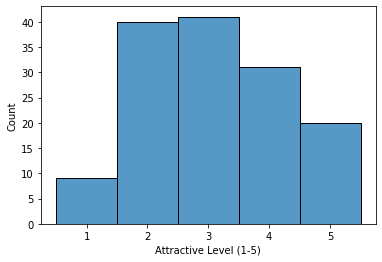

In [46]:
sns.histplot(pf['Attractive Level (1-5)'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])

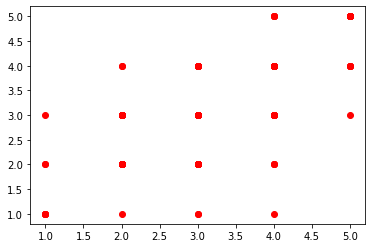

In [47]:
plt.plot(pf['Question 2: Sound (1-5)'], pf['Attractive Level (1-5)'], 'ro')

In [48]:
pf.columns

Index(['Unnamed: 0', 'ID', 'Annotater', 'video id', 'Attractive Level (1-5)',
       'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)'],
      dtype='object')

<AxesSubplot:>

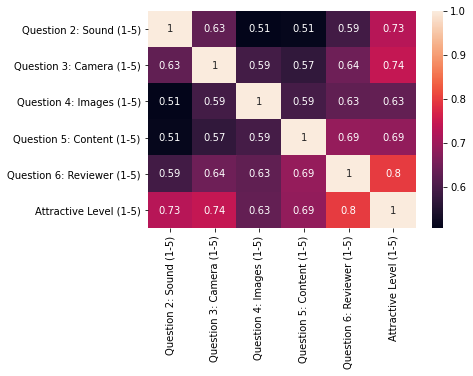

In [49]:
sns.heatmap(pf[core_columns + [output_column]].corr(), annot=True)

<AxesSubplot:>

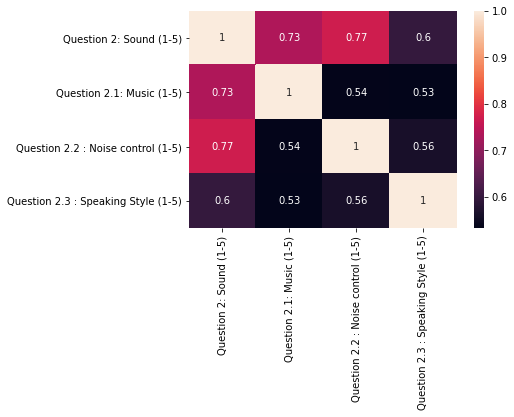

In [50]:
sns.heatmap(pf[['Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)', 'Question 2.3 : Speaking Style (1-5)']].corr(),annot=True)

<AxesSubplot:>

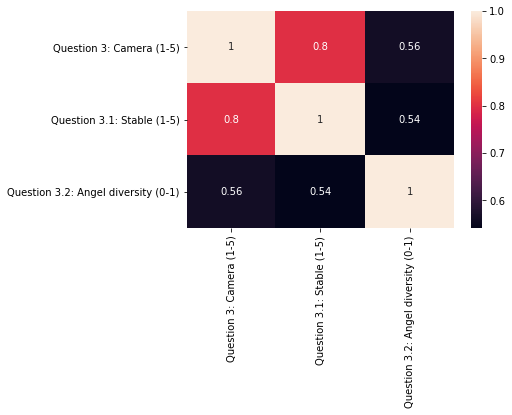

In [51]:
sns.heatmap(pf[['Question 3: Camera (1-5)', 'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)']].corr(),annot=True)

<AxesSubplot:>

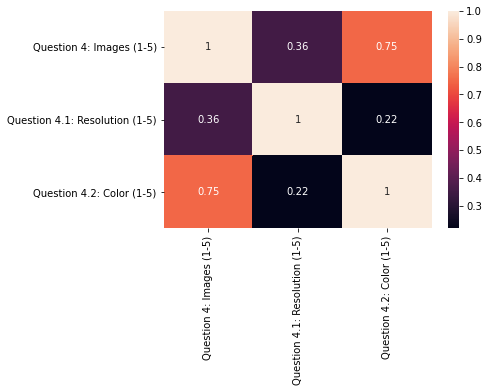

In [52]:
sns.heatmap(pf[['Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)']].corr(),annot=True)

<AxesSubplot:>

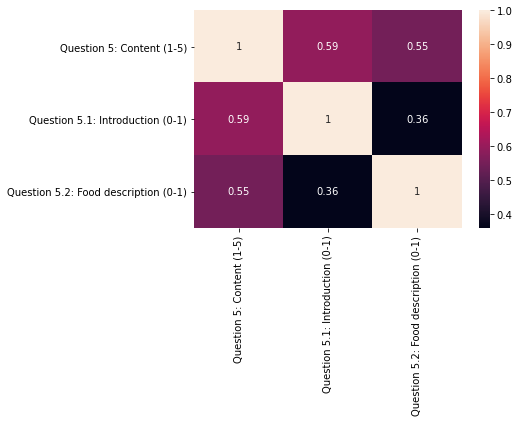

In [53]:
sns.heatmap(pf[['Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)']].corr(),annot=True)

<AxesSubplot:>

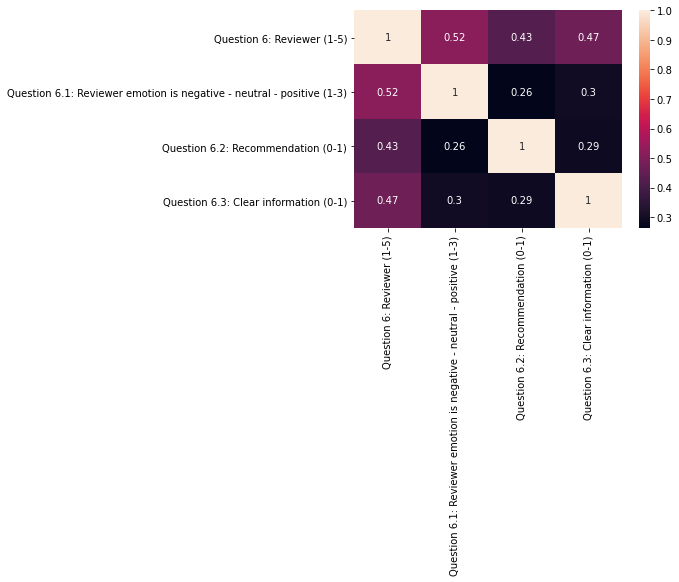

In [54]:
sns.heatmap(pf[['Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)']].corr(),annot=True)

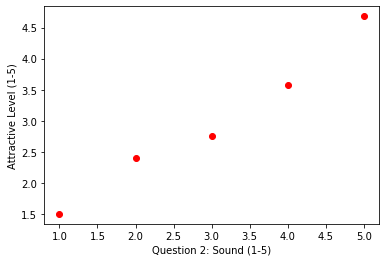

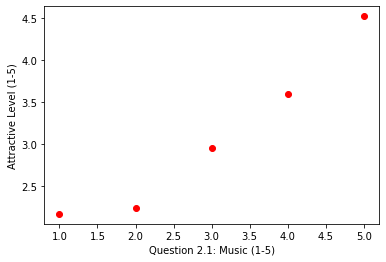

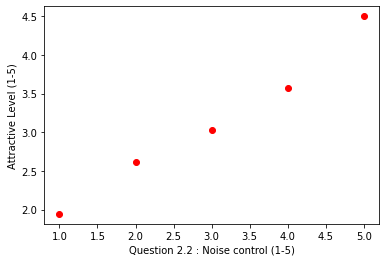

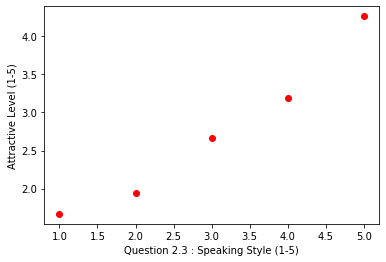

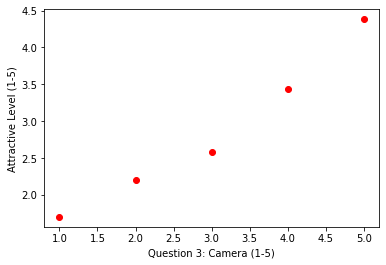

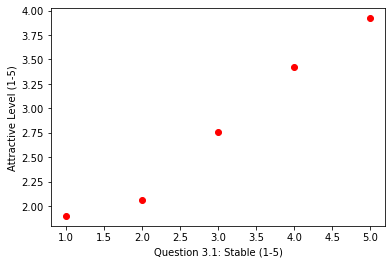

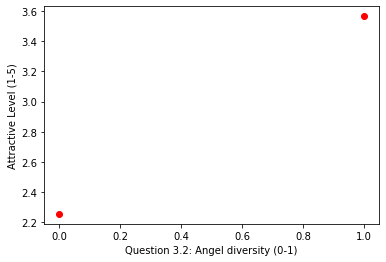

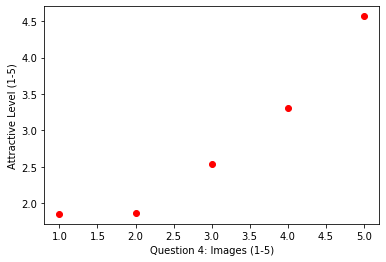

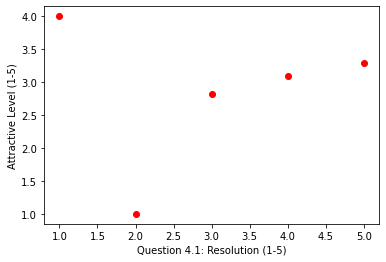

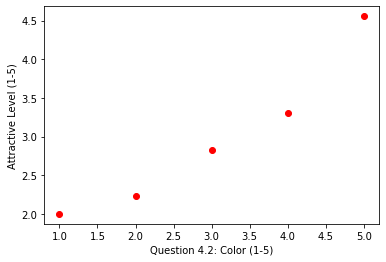

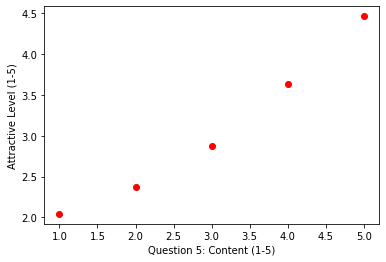

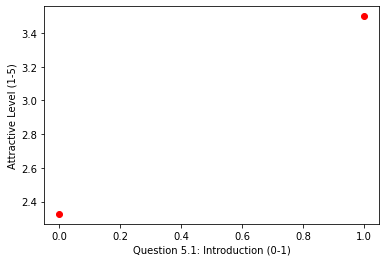

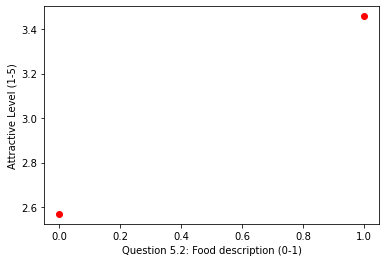

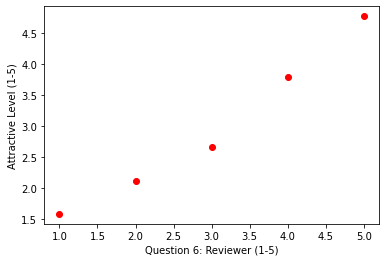

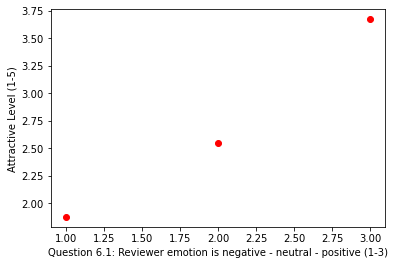

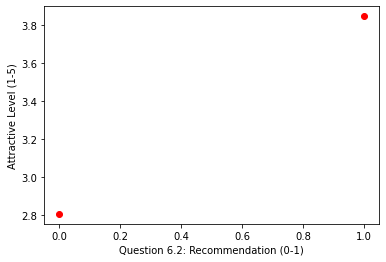

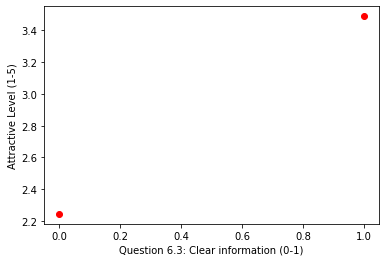

In [55]:
for col in columns:
    ls = []
    for i in range(0, 6):
        ls.append(pf[pf[col] == i]['Attractive Level (1-5)'].mean())
    plt.plot([x for x in range(0, 6)], ls, 'ro')
    plt.xlabel(col)
    plt.ylabel(output_column)
    plt.show()